# Build trial movie
In the Hires lab, we pride ourselves in the precision and depth of quantification.  We record brain activity at 10kHz and video at 1kHz (1000 fps) and develop software to track motion and quantify touch and associated forces. The code below will transform a single trial into a movie that highlights these details. 

This code is used to transform data from an exported Matlab structure of Hires Lab data into a trial animation. You will need to use export_for_moviepy.mat to transform your data into a valid structure for Python. In the below, list the directory for the videos and and load the .mat file for the transformed Matlab struct. 

In [3]:
import os
import numpy as np
import scipy.io as sio
import moviepy as mpy
from moviepy.editor import VideoClip, VideoFileClip, clips_array
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

In [4]:
# Install a pip package in the current Jupyter kernel if package isnt installed 
import sys
!{sys.executable} -m pip install moviepy

In [5]:
# set top level parameters and load data
animation_duration = 20 # in seconds
# video_directory = 

ds = sio.loadmat(os.getcwd() + '/raw/cell_29.mat')['export_struct'][0,0]
trial = np.random.choice(ds['thetaAtBase'].shape[1],1)[0] # sample a random trial 

### Compose parts for trial clip
- clip 1 : video from one single trial
- clip 2 : tracked components into time-series 

In [6]:
# Load data and define variables for clip 1
# need directory for video then we gucci to use the reference below

# video_clip_name = ds['video_file_names'][:,trial][0][0]
# video_clip = VideoFileClip(video_clip_name + ".mp4", audio=False)

video_clip = VideoFileClip(os.getcwd() + '/raw/test_video.mp4',  audio=False)

# video editing via rotation and forcing clip size
video_clip = mpy.video.fx.all.speedx(video_clip,final_duration = animation_duration)
video_clip = mpy.video.fx.all.rotate(video_clip, -90, unit='deg')
video_clip = mpy.video.fx.all.mirror_x(video_clip)
video_clip = mpy.video.fx.all.resize(video_clip,0.8)
# video_clip.ipython_display(maxduration = 200) #use this to view video 

In [7]:
# Define variables for clip 2 time-series
x = np.arange(0,len(ds['thetaAtBase']))
# amplitude_mask = ds['amplitude'][:,trial]<5
# filtered_phase = ds['phase'][:,trial]
# filtered_phase[amplitude_mask] = np.nan 

y0 = ds['thetaAtBase'][:,trial]
y1 = ds['amplitude'][:,trial]
y2 = ds['setpoint'][:,trial]
y3 = ds['phase'][:,trial]
y4 = ds['spikes_trace'][:,trial]

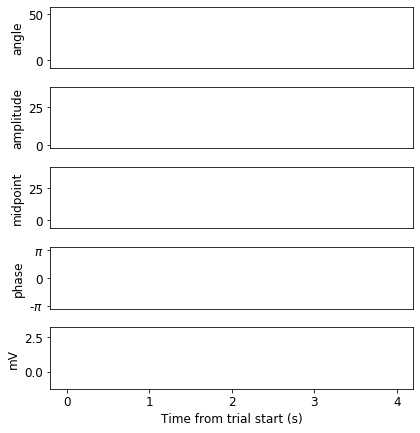

In [8]:
# top level definitions 
duration= animation_duration # duration of animation in seconds
my_dpi = 120 # find here https://www.infobyip.com/detectmonitordpi.php
fig_size = np.array(video_clip.size)/my_dpi # time-series to match video size
plt.rcParams.update({'font.size':12})

# Set up plots for animation 
fig, ax = plt.subplots(5,1, figsize = (6,fig_size[1]*2))
# fig.set_figheight(img_height)
# fig.set_figwidth(img_width)
l0, = ax[0].plot(x, y0, lw=1, c='k')
l1, = ax[1].plot(x, y1, lw=1, c='k')
l2, = ax[2].plot(x, y2, lw=1, c='k')
l3, = ax[3].plot(x, y3, 'k.',markersize=5)
l4, = ax[4].plot(x, y4, lw=1, c='k')

labels = ['angle', 'amplitude', 'midpoint', 'phase', 'mV']
for ix,k in enumerate(ax):
    ax[ix].set_xticks([])
    ax[ix].set_ylabel(labels[ix])
ax[3].set_yticks([-3.14, 0, 3.14])
ax[3].set_yticklabels(['-$\pi$',0,'$\pi$'])
ax[4].set_xticks([0,1000,2000,3000,4000])
ax[4].set_xticklabels([0,1,2,3,4])
ax[4].set_xlabel("Time from trial start (s)")
fig.tight_layout() 

# Animate figure with moviepy 
def make_frames(t):
    t_idx = int((len(x)/duration) * t) #size of each step 
    for idx,val in enumerate(ax):
        exec('l' + str(idx) + '.set_xdata(x[:t_idx])')
        exec('l' + str(idx) + '.set_ydata(y' + str(idx) +'[:t_idx])')
    return mplfig_to_npimage(fig)

plot_clip = VideoClip(make_frames, duration=duration)
# plotclip.write_videofile('trial_animation.mp4', fps=20, codec='libx264', ffmpeg_params = ['-preset', 'veryslow','-crf','17'])
# plotclip.write_gif('trial_parameters.gif', fps=25)
# plotclip.ipython_display(fps=20, loop=True, autoplay=True,progress_bar=False)

In [9]:
# stitch together final clip side by side. 
# clips_array requires margins to be added 
final_clip = clips_array([[clip.margin(2, color=[255,255,255]) for clip in
                [video_clip, plot_clip]]],
                bg_color=[255,255,255])

final_clip.write_gif(os.getcwd() + '/products/trial_animation.gif',fps=20)
# final_clip.write_videofile('trial_animation.mp4', fps=20)


t:   0%|          | 2/400 [00:00<00:28, 14.00it/s, now=None]

MoviePy - Building file /Users/jonathancheung/Documents/GitHub/still-learning/MoviePy/localization_trial_animation/products/trial_animation.gif with imageio.
